# APMTH 207: Advanced Scientific Computing: 
## Stochastic Methods for Data Analysis, Inference and Optimization
## Group Project: Paper Tutorial
**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>

**Collaborators:**

- Dylan Randle dylanrandle@g.harvard.edu

- Michael S. Emanuel mse999@g.harvard.edu

- Anna Davydova davydova@g.harvard.edu



In [1]:
#RUN THIS CELL
import requests
from IPython.core.display import display, Image
baseurl='https://raw.githubusercontent.com/IACS-AM-207-Braavos/AM-207/master/misc/'

In [2]:
def show_img(url, width=None, height=None):
    display(Image(requests.get(baseurl+url).content, width=width, height=height))

---

## Bayesians take on the Belamies

### Bayesian GAN Paper Tutorial
<br>
Source: Saatchi Y., Gordon AW. 2017. Bayesian GAN. Advances in Neural Information Processing Systems 30 (NIPS), 2017. arXiv:1705.09558 [stat.ML]
<br>
URL: https://arxiv.org/pdf/1705.09558.pdf

### Tutorial Outline:
1. Abstract
<br>
2. Introduction
<br>
3. Bayesian GAN Theory
<br>
4. Bayeisan GAN Implementation
<br>
5. Conclusions
<br>
6. Gratuitous Titular Reference
<br>
7. Citations

### Abstract: 

In their paper, Yunus Saatchi and Andrew Gordon Wilson argue that applying Bayesian framework to general adversarial network (GAN) would help prevent mode collapse and result in a more straightforward and accurate model without feature matching or mini-batch discrimination. Specifically, they tackle GAN through a lens of fully probabilistic inference and marginalize the weights of the generator and discriminator using stochastic gradient Hamiltonian Monte Carlo. Our analysis below follows closely in the author's footsteps as we re-create their framework for Bayesian GAN and apply their findings to several examples. 

### Introduction:
 
#### GANs Defined: 
Generative Adversarial Networks (GANs), as the name suggests, contain two neural network adversaries - Generator and Discriminator - with one forging new data and the other discerning truth from deception. (Goodfellow et al., 2014b)[1]. The discriminator usually takes the form of a convolutional network that aims to correctly identify a given label (usually an image) given a group of associated features. In other words the discriminator estimates p(y|X).  The generator, on the other hand, attempts to predict the features given a label (i.e. p(X|y)).  Thus, the generator learns the distribution of the data and then creates new data, while the discriminator attempts to correctly identify the label authenticity given the true data and the fake data coming from the generator. 

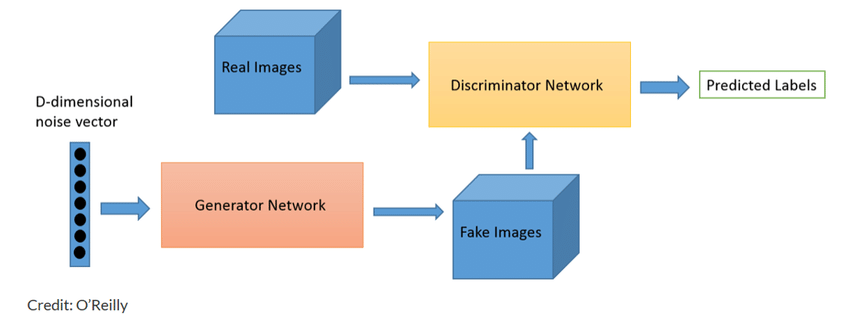

In [9]:
show_img('OReillyGAN.png')

Source: https://skymind.ai/wiki/generative-adversarial-network-gan

At it's core, the generator aims to generate data that resembles the truth so closely that it fools the discriminator into classifying it as authentic. The discriminator has an opposite objective of catching generator's fakes. This internal standoff between these two powerful and evolving algorithms has been used for image generation and image enhancement and a growing list of other applications.

###### GAN Image Generation Example: 
Images below are 'fake celebrities' headshots that have been generated by GANs after extensive training on real celebrity photos.

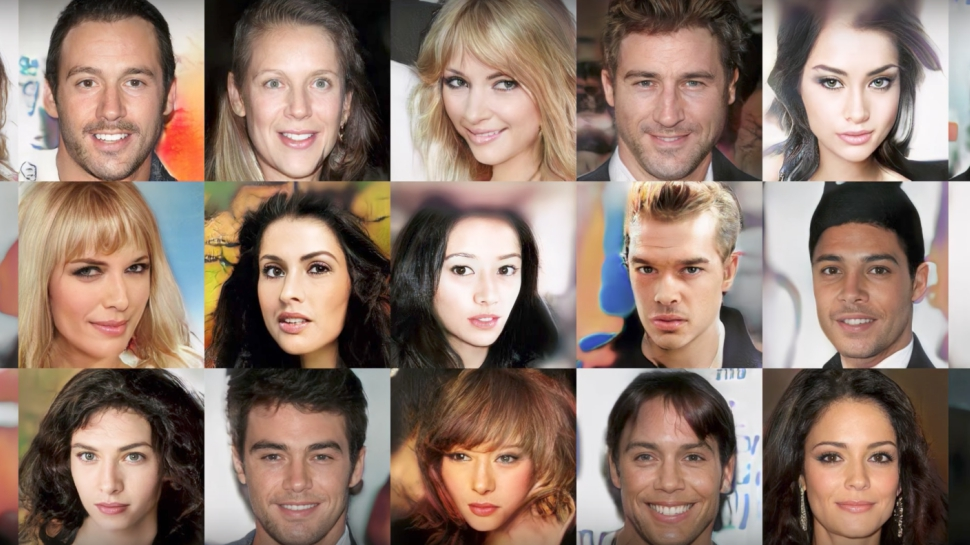

In [13]:
show_img('fake_celebrities.jpg', width=800, height=1200)

Credit: Nvidia
<br>
Source: https://nerdist.com/nvidia-ai-headshots-fake-celebrities/

##### GAN Image Enhancement Example:
GANs have also done incredibly well in the field of image enhancement as can be seen from the comparative analysis below.

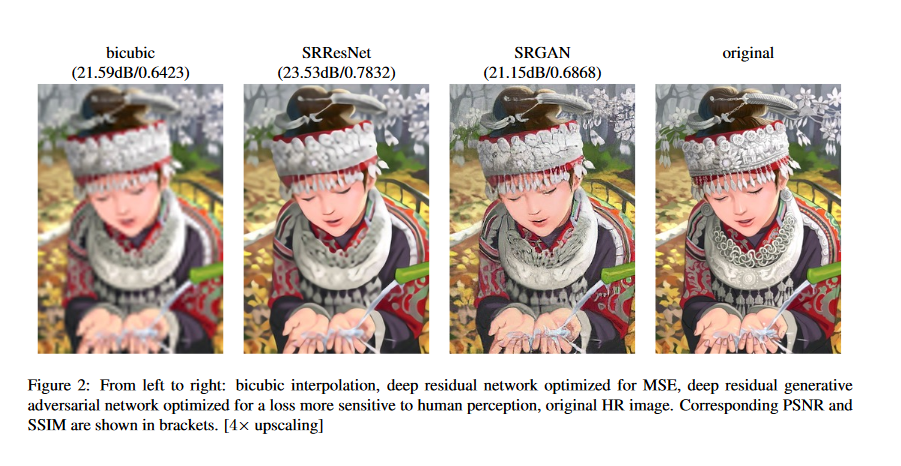

In [14]:
show_img('enhanced_image.png', width=800, height=2000)

Credit: Ledig et al. (2016)
<br>
Source:https://arxiv.org/pdf/1701.00160.pdf

#### GAN Formulation:

Thinking about GAN in mathematical terms, we note that the tension between the generator and the discriminator is a zero-sum game. Therefore, the loss functions offset each other as follows:

$$L^{(G)}=-L^{(D)}$$

The opposing objectives of the generator and the discriminator can be summarized as follows:

$$
\begin{equation}
\mathop{min}_{\textbf{G}}
\mathop{max}_{\textbf{D}}
E_{x\sim P_{real}}[log(D(x))]+E_{z\sim P_{noise}}[log(1-D(G(z)))]
\end{equation}
$$

Recall that $D$ estimates $p(y|x)$.  In other words, $D(x)$ outputs the probability that a given input is a 'real' image. Conversely, $1-D(G(z))$, is the probability that the forged image produced by the generator is fake (recall $z$ is the noise vector). Thus, the better the generator gets at forging the images it feeds to the discriminator the higher the value of $D(G(z))$ and $(1-D(G(z))$ starts to approach zero. The discriminator has the opposite goal as it attempts to minimize $D(G(z))$ down to zero by catching all the forgeries, while maximizing $D(x)$. If it accomplishes this goal, we get a value closest to $0$ (i.e. $log(1)$) for the second half of the expression above. The diagram below outlines the training process for the discriminator and the generator and their respective gradients.

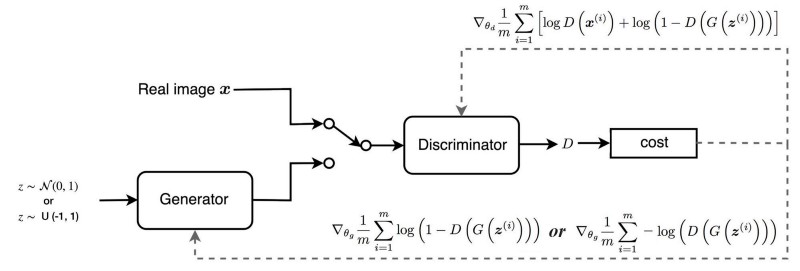

In [17]:
show_img('gan_gradient.jpeg')

Source:https://medium.com/@jonathan_hui/gan-why-it-is-so-hard-to-train-generative-advisory-networks-819a86b3750b

Given the discriminator and generator's conflicting objectives, it is not hard to see why training GANs is computationally expensive (i.e takes a long time to converge) and prone to several issues. Traditional GAN challenges include: 1) non-covergence, 2) big imbalance between the performance of $D$ and $G$ leading to overfitting, 3) mode collapse (generator memorizes the data and stops creating varied samples), 4) shrinking gradient when discriminator overpowers generator and as the result the generator stops learning, 5) sensitivity to hyperparameters. The bayesian approach to GANs aims to alleviate the mode collapse issues (more on this in the next section) and make training more stable.

The diagram below provides another illustration of how GAN works with the MNIST data set. The discriminator trains on a data set of real hand written images, while the generator feeds on randomly generated noise to create fake hand written digits. It is then the discriminator's job to distinguish between real and fake images. As the generator gets better and better (more and more iterations) at producing forgeries, the discriminator gets better and spotting them. As this iterative process continues, we end up with a set of generated hand written images nearly indistinguishable from the original data set.

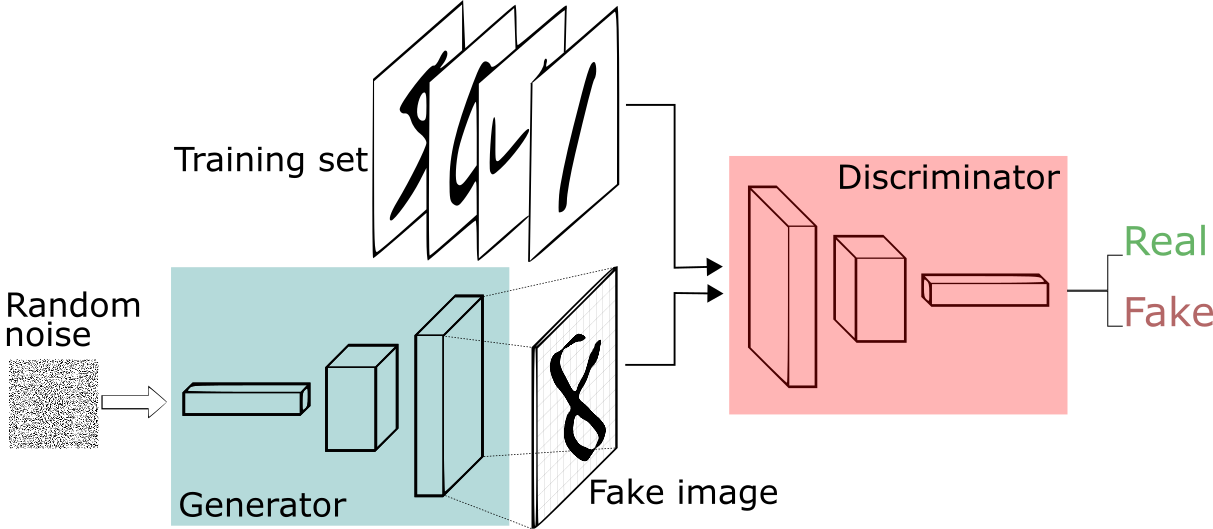

In [19]:
show_img('GANdiagram.png', width=800, height=12000)

Source: https://skymind.ai/wiki/generative-adversarial-network-gan

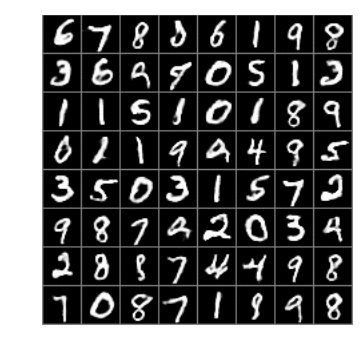

In [20]:
show_img('MNIST_gan.gif')

Source: https://towardsdatascience.com/implementing-a-generative-adversarial-network-gan-dcgan-to-draw-human-faces-8291616904a

#### Research Motivation: 
While GANs have proven themselves to be quite powerful, they suffer from several issues as discussed briefly above. Specifically, instances of mode collapse have been noted when the generator ends up memorizing a handfull of training examples. In addition, the authors of the paper highlight the need for meaningful intervention to ensure stability of the network, such as feature matching, label smoothing and mini-batch discrimination.  While we are less familiar with this terminology, several papers have been written on this topic by [Radfod, Metz and Chintala](https://arxiv.org/abs/1511.06434) as well as [Salimans et al.](https://arxiv.org/abs/1606.03498)[2,3].  The authors also note that most of the research aimed at fixing these issues has focused on finding a better divergence metric for the GAN model (i.e. using Wasserstein or f-divergences instead of Jensen-Shannon).  Yunus Saatchi and Andrew Gordon Wilson take a different approach and propose a Bayesian route toward a more stable GAN architecture. Specifically, the authors apply stochastic gradient Hamiltonian Monte Carlo methods to marginalize conditional posteriors over the weights of the generator and discriminator (more on this below). 
<br>
<br>
The bayesian approach makes sense as we think about the stability of the GAN model.  By learning full distributions over the generator and the discriminator network weights, we are going to end up with a much richer distribution and more diverse samples, which should make the GAN model less prone to getting stuck in one mode with a handful of memorized images, or be too sensitive to imbalances in the data set.




### Bayesian GAN Theory:
#### Assumptions:
Given our data set is as follows:

$$
\begin{equation}
D=\{x^{(i)}\};
x^{(i)} \sim p_{data}(x^{(i)})
\end{equation}
$$

We are looking for distribution of:

$$
\begin{equation}
 p_{data}(x)
\end{equation}
$$

Recall the white noise vector from the diagram in the introduction. In this case the authors propose that we transform white noise $z \sim p(z)$ through our generator. The authors define the Generator and the Discriminator as follows:

\begin{equation}
 G(z;\theta_g)
\end{equation}

\begin{equation}
 D(x;\theta_d)
\end{equation}

Where $G$ and $D$ are neural networks with weight vectors $\theta_g$ and $\theta_d$ respectively.  Recall that traditional GAN considers just one $\theta_g$ and one $\theta_d$. Here we are looking at full posterior distributions of these $\theta$'s and will conduct the sampling process from our priors as follows:

#### Sampling:

- Step 1: Sample from the  $\theta_g$ posterior that parametarizes our generator defined above.


\begin{equation}
 \theta_g \sim p(\theta_g)
\end{equation}

- Step 2: Sample $z$'s which serves as the input for the generator defined above.


\begin{equation}
 z^1,.....,z^n \sim p(z)
\end{equation}

- Step 3: Obtain distribution of x given the sampled z's and $\theta_g$s.

\begin{equation}
 \tilde{x}^j=G(z^j;\theta_g)\sim p_{generator}
\end{equation}

The authors then propose two approaches for posterior inference over our $\theta$'s.

#### 1. Unsupervised Learning:

Here, the authors sample from the following conditional posteriors:

\begin{equation}
 p(\theta_g|z,\theta_d)\propto\big(\prod_{i=1}^{n_g}D(G(z^i;\theta_g);\theta_d)\big)p(\theta_g|\alpha_g)
\end{equation}

As we note above, this is a posterior for fake data points.  Where $p(\theta_g|\alpha_g)$ is a prior and our likelihood is wrapped in a product of discriminator probabilities for identifying the fake images as real. 

\begin{equation}
 p(\theta_d|z,X,\theta_g)\propto\prod_{i=1}^{n_d}D(x^i;\theta_d)*\prod_{i=1}^{n_g}(1-D(G(z^i,\theta_g);\theta_d))* p(\theta_d|\alpha_d)
\end{equation}

This is a discriminator posterior. Here,  $p(\theta_d|\alpha_d)$ is a prior. The two likelihoods wrapped in the product functions are: 1) probability of identifying real data correctly and 2) probability of identifying fake data correctly (which is just the joint probability of being right). 

Where $\alpha_g$, $\alpha_d$ and $n_g$, $n_d$ are the corresponding hyperparameters on the priors and number of mini-batch samples respectively for $G$ and $D$.

The authors define $X$ as follows:

\begin{equation}
 X = \{x^i\}_{i=i}^{n_d}
\end{equation}

Then use Monte Carlo to marginalize the noise component $z$ from the posterior updates.  They demonstrate this as follows:

\begin{equation}
 p(\theta_g|\theta_d)= \int p(\theta_g,z|\theta_d)dz=\int p(\theta_g|z,\theta_d)p(z|\theta_d)dz
\end{equation}

since $p(x)=p(z|\theta_d)$, this reduces nicely to:

\begin{equation}
 p(\theta_g|\theta_d)\approx\frac{1}{J_g}\sum_{j=1}^{J_g}p(\theta_g|z^j,\theta_d), z^j\sim p(z)
\end{equation}

by the same token we have:

\begin{equation}
 p(\theta_d|\theta_g)\approx\frac{1}{J_d}\sum_{j=1}^{J_d}p(\theta_d|z^j,X,\theta_g), z^j\sim p(z)
\end{equation}

We then iteratively sample posteriors from $p(\theta_d|\theta_g)$ and $p(\theta_g|\theta_d)$. The authors argue that the varied samples of $\theta_g$ reduce the risk of mode collapse (i.e. instead of one we now have a whole distribution of generators leading to much more diverse data samples and generated images) and boost the performance of the discriminator. This is then matched by the scope of  $\theta_d$ samples that further strengthen the adversarial standoff between the generator and the discriminator, making the entire model more robust.

#### 2. Semi-Supervised Learning:

For the semi-supervised approach, we will consider a data set without labels and a much smaller slice of data with labels $(1,...,K)$. Here, our model simultaneously learns the distribution of $x$ both for labeled and unlabeled observations. The authors assert that this modeling approach will produce better results than fully supervised or unsupervised learning. This makes sense intuitively but is also something we are going to test in the implementation section of this tutorial.

Here we define our discriminator as follows:

\begin{equation}
 D(x^i=y^i;\theta_d)
\end{equation}

Thus, the discriminator now outputs the probability that a given $x$ belongs to class $y$.  What this means is that instead of outputting probability of an image being real or fake, the discriminator actually classifies it into one of the labels in the label set $(1,...,K)$.  The authors use class $y=0$ for any $x$ values coming from the generator.

We then have the following posteriors:

\begin{equation}
 p(\theta_g|z,\theta_d)\propto\big(\prod_{i=1}^{n_g}\sum_{y=1}^{K} D(G(z^i;\theta_g)=y;\theta_d)\big)p(\theta_g|\alpha_g)
\end{equation}

\begin{equation}
 p(\theta_d|z,X,y_s,\theta_g)\propto\prod_{i=1}^{n_d}\sum_{y=1}^{K} D(x^i=y;\theta_d)*\prod_{i=1}^{n_g}(D(G(z^i,\theta_g)=0;\theta_d))* \prod_{i=1}^{N_s}(D(x_s^i=y_s^i;\theta_d))p(\theta_d|\alpha_d)
\end{equation}

Structurally, the expressions above are much like the unsupervised posteriors from the previous section. The key difference is that now the likelihoods include the sum of specific class probabilities (i.e. likelihoods across different classes $(1,...,K)$). Here we are also using three types of samples: 1) $n_g$ are the samples from the generator, 2) $n_d$ are the unlabeled samples and 3) $N_s$ are labeled observations that are contained in a slice that is much smaller than the total number of observations $n$.

Applying what we already know from unsupervised approach above, we marginalize the posteriors over $\theta_d$ and $\theta_g$. The authors propose using an average of all the samples with respect to the posterior over $\theta_d$ to estimate class $y$ for a given instance of $x$. 

\begin{equation}
 p(y_j|x_j,D)=\int p(y_j|x_j, \theta_d)p(\theta_d|D)d\theta_d\approx \frac{1}{T}\sum_{k=1}^{T}p(y_j|x_j,\theta_d^k \sim p(\theta_d|D)
\end{equation}

#### Application of Stochastic Gradient HMC

In order to marginalize the posteriors both for unsupervised and semi-supervised learning procedures over $\theta_d$ and $\theta_g$, the authors deploy the Stochastic Gradient Hamiltonian Monte Carlo (SGHMC) approach. They state three key reasons for this choice: 1) SGHMC is analogous to SGD (Stochastic Gradient Descent) that has proven to work well with GANs, 2) it allows the authors to import parameters such as learning rate, momentum, etc. from SGD to SGHMC, 3) SGHMC best supports the author's goal to explore richer, multimodal distributions over $\theta_g$ (i.e. weights of the generator). They argue that  other alternatives tend to provide unimodal distributions. We will not go into a lot of detail on this topic to prove/disprove the author's contention. However, there is a very detailed paper on the topic of SGHMC by [Chen et al](https://arxiv.org/abs/1402.4102)[4]

Below, we present the author's algorithm in pseudocode. Things to keep in mind when reading this algorithm: 1) This is just one iteration of Bayesian GAN, 2) the authors define $\alpha$ as the friction term for SGHMC and $\eta$ as the learning rate, 3) during the simple MC sampling process, the authors take $J_d$ samples for the discriminator and $J_g$ samples for the generator, 4) they then take $M$ SGHMC samples for each simple MC sample.

##### BGAN Algorithm with SGHMC

1. From previous iteration of sampling, represent posteriors as follows:

$$\{\theta_g^{j,m}\}_{j=1,m=1}^{J_g,M} , \{\theta_d^{j,m}\}_{j=1,m=1}^{J_d,M}$$
    

Then we sample the *generator* as follows:

2. For number of $J_g$ MC iterations:
<br>
    - Sample $J_g$ samples of noise {$z^1,...,z^{J_g}$} from its prior p(z). Note, each $x^i$ has $n_g$ samples.
    <br>
    - For M iterations, use SGHMC to update your set of posterior $p(\theta_g|\theta_d)$ samples as follows:
        <br>
 $$ \theta_{g}^{j,m} \leftarrow \theta_g^{j,m} + v; v\leftarrow(1-\alpha)v+\eta\big ( \sum_{i=1}^{J_g}\sum_{k=1}^{J_d}\frac{\partial log p(\theta_g|z^i,\theta_d^{k,m})}{\partial \theta_g}\big)+n   $$
<br>
    Where $n\sim N(0,2\alpha\eta I)$. Append $\theta_g^{j,m}$ to our set of samples

Then we sample the *discriminator* as follows:

3.  For number of $J_d$ MC iterations:
<br>
    - Take minibatch sized sample of $J_d$ noise samples{$z^1,.....,z^{J_d}$} like we did in step 2.
    <br>
    - Take minibatch sized sample of $n_d$ samples of x from our data set.
    <br>
    - For M iterations, run SGHMC to update $p(\theta_d|z,\theta_g)$
    <br>
     $$ \theta_{d}^{j,m} \leftarrow \theta_d^{j,m} + v; v\leftarrow(1-\alpha)v+\eta\big ( \sum_{i=1}^{J_d}\sum_{k=1}^{J_g}\frac{\partial log p(\theta_d|z^i,x,\theta_g^{k,m})}{\partial \theta_d}\big)+n   $$
<br>
    Where $n\sim N(0,2\alpha\eta I)$. Append $\theta_d^{j,m}$ to our set of samples
    

#### In a nutshell:
For the generator $\theta_g$, we produce $J_g$ samples by first sampling our noise and then running SGHMC to produce our $\theta_g$ samples by taking the derivatives of log-likelihood w.r.t. $\theta_g$ weights with our noise samples and discriminator $\theta_d$. The authors included the term $\eta$ above that comes from the SGHMC paper by [Chen et al](https://arxiv.org/abs/1402.4102) and is shown to have a regularizing effect on the noise in the algorithm.[4]  Once we get our new generator sample we append it to our existing list of generator samples. Then rinse and repeat.  The key difference between the generator and the discriminator $\theta$'s sampling is that we include $x$ from our 'real' dataset for the discriminator (which is expected given our definition of the discriminator in the previous sections). After running this algorithm iteratively, the authors produce a set of posterior  $\theta_d$ and $\theta_g$ samples. They note the need for burnin here as samples tend to get more robust overtime.

### Bayesian GAN Implementation:

#### Unsupervised: Four Shapes Dataset (https://www.kaggle.com/smeschke/four-shapes/version/2#shapes.zip)

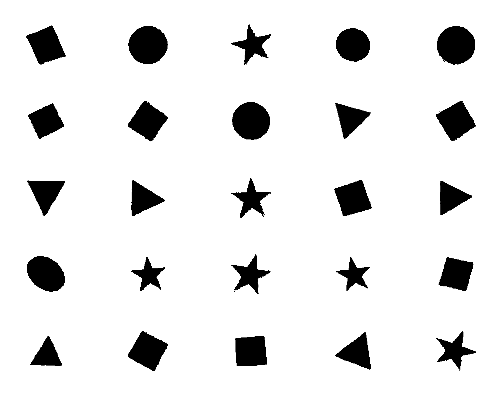

In [22]:
show_img('RAW_24000.png', width=400, height=8000)

We decided to have a bit of and fun and train the GAN on a simple dataset of 200x200 black-and-white images of four different shapes: circles, rectangles, triangles, and stars (each rotated, scaled, and translated to provide variety). We chose this dataset because it has four clear modes, and we wanted to see if Bayesgan would properly model this. We follow the instructions described at: https://github.com/andrewgordonwilson/bayesgan, and complete our work in the repo: https://github.com/dylanrandle/bayesgan.

First, download and extract the four shapes dataset into `bayesgan/datasets`. We provide a little script to convert the images to numpy arrays and save them as .npy files, `bayesgan/save_shapes.py` which you should run:

``` python
import os, glob, cv2
import numpy as np
from sklearn.model_selection import train_test_split

if not os.path.isdir("four_shapes"):
    os.mkdir("four_shapes")

circles = list(sorted(glob.glob(os.path.join('circle/', '*.png'))))
triangles = list(sorted(glob.glob(os.path.join('triangle/', '*.png'))))
squares = list(sorted(glob.glob(os.path.join('square/', '*.png'))))
stars = list(sorted(glob.glob(os.path.join('star/', '*.png'))))
shapes = [circles, triangles, squares, stars]

img_inputs = []
for shape in shapes:
    for f in shape:
        img = cv2.imread(f, 0)
        img = img.astype(float)/255.
        img = img.reshape((img.shape[0], img.shape[1], 1))
        img_inputs.append(img)

img_inputs = np.array(img_inputs)
img_train, img_test = train_test_split(img_inputs, test_size=0.2)

print('train shape', img_train.shape)
print('test shape', img_test.shape)

np.save('four_shapes/train_shapes.npy', img_train)
np.save('four_shapes/test_shapes.npy', img_test)

fake_ytrain = np.zeros(shape=img_train.shape[0], dtype=int)
fake_ytest = np.zeros(shape=img_test.shape[0], dtype=int)

print('y train shape', fake_ytrain.shape)
print('y test shape', fake_ytest.shape)

np.save('four_shapes/train_labels.npy', fake_ytrain)
np.save('four_shapes/test_labels.npy', fake_ytest)
```

Next, we add a dataset class in `bgan_utils.py`, as described in the original repo:

``` python
class FourShapes():
    def __init__(self):
        self.imgs = np.load('datasets/four_shapes/train_shapes.npy')
        self.test_imgs = np.load('datasets/four_shapes/test_shapes.npy')
        self.labels = np.load('datasets/four_shapes/train_labels.npy')
        self.test_labels = np.load('datasets/four_shapes/test_labels.npy')
        self.labels = one_hot_encoded(self.labels, 4)
        self.test_labels = one_hot_encoded(self.test_labels, 4)
        self.x_dim = [200, 200, 1] # img dims
        self.num_classes = 4
        self.dataset_size = self.imgs.shape[0]

    @staticmethod
    def get_batch(batch_size, x, y):
        """Returns a batch from the given arrays.
        """
        idx = np.random.choice(range(x.shape[0]), size=(batch_size,), replace=False)
        return x[idx], y[idx]

    def next_batch(self, batch_size, class_id=None):
        return self.get_batch(batch_size, self.imgs, self.labels)

    def test_batch(self, batch_size):
        return self.get_batch(batch_size, self.test_imgs, self.test_labels)
```

Finally, we make two modifications to `run_bgan.py`: 
``` python
from bgan_util import FourShapes
```
...
```python
elif args.dataset == 'four_shapes':
    dataset = FourShapes()
```
and we are ready to go. From the top-level of `bayesgan`, simply run:
``` bash
./run_bgan.py --data_path datasets/four_shapes --dataset four_shapes --z_dim 10 --num_mcmc 2 --out_dir four_shape_unsup --train_iter 75000 --save_samples --n_save 100
```

We trained the model on batches of size 32 for 75000 iterations, with `z_dim=10`. This took roughly one day on a Nvidia Titan Xp GPU. Below we present some results and discussion from this experiment. 

**Figure 1:** Generator outputs from iterations 1000, 2000, and 5000

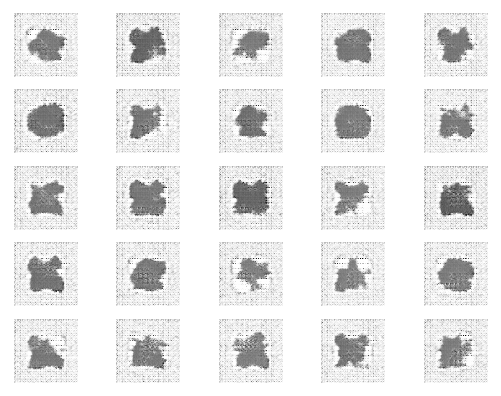

In [23]:
show_img('B_DCGAN_0_13.20_1000.png')

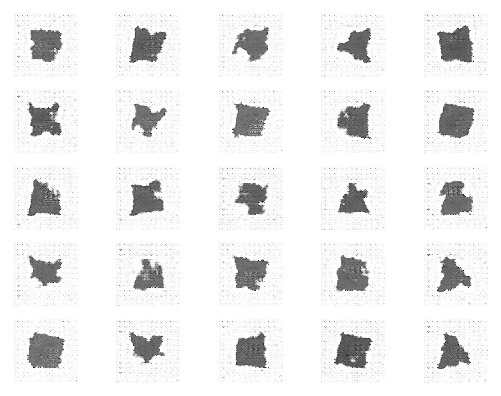

In [24]:
show_img('B_DCGAN_0_12.87_2000.png')

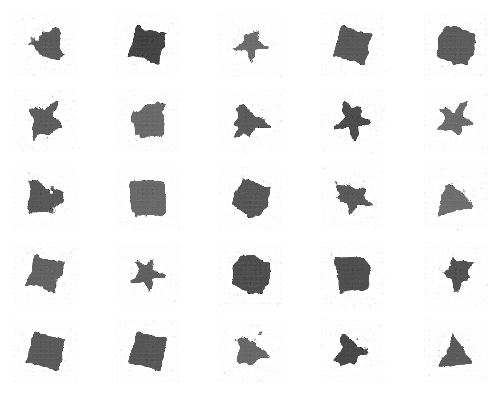

In [25]:
show_img('B_DCGAN_0_12.22_5000.png')

It is interesting to notice how in the early iterations, there is a distribution of pixels that is quite spread out, whereas by iteration 5000 the pixels are much more concentrated on the shape being produced. If we let the Bayesgan run for much longer, we start to see some pretty nice outputs.

**Figure 2:** Generator outputs from iteration 61,800

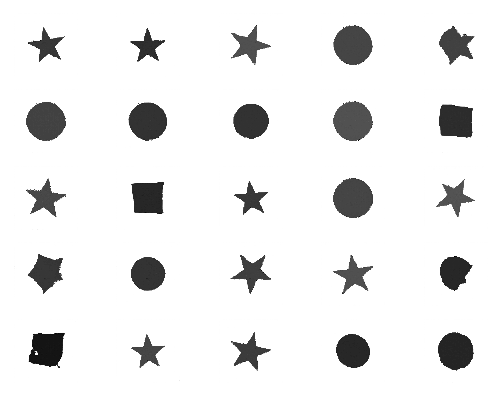

In [27]:
show_img('B_DCGAN_0_15.85_61800.png')

We can see that our generator deals well with the multi-modal distribution of stars and circles quite well, but struggles with squares and triangles. However, we note the training curves below and postulate that if we had increased the `z_dim` of our model, it may have perfomed better.

**Figure 3:** Bayesgan Discriminator and Generator losses in train/test.

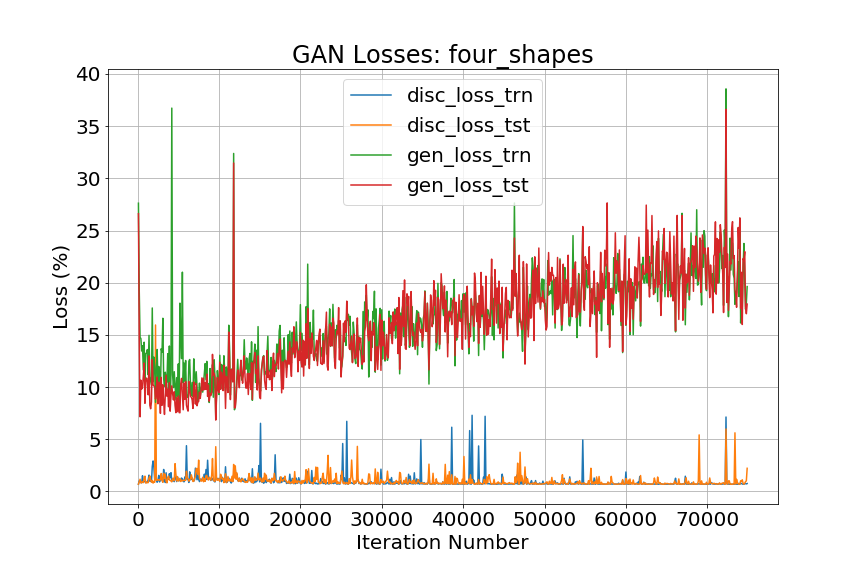

In [29]:
show_img('four_shapes.png', width=600, height=10000)

It appears the generator started to diverge in training, as the loss on both train and test increases over time. We have read that this can happen when both a) the discriminator becomes too good at predicting fakes early on, and b) the generator does not have the representational capacity to fool it. Recalling that the GAN setup is a two-player, zero-sum game, it is akin to the situation of a big bully who is just too strong to be beaten. Something we could try is to increase the `z_dim` to give the generator greater representational capacity. Regardless, we were pleased with the multi-modal examples the generator produced even given the `z_dim=10` constraint of the above experiment.

#### Semi-supervised: MNIST with 1000 labels

We were impressed by the results in the paper showing that Bayesgan could achieve very high accuracy on MNIST using only 100 labeled examples (10 per class), and decided to see how it would perform in a setting not shown by the paper. We set $N=1000$, with 100 examples per class. We ran this experiment with both the Bayesgan as well as a baseline ML-GAN (maximum-likelihood GAN).

Bayesgan:
``` bash 
./run_bgan_semi.py --data_path . --dataset mnist --out_dir mnist_semi_bayes_1k --train_iter 10000 --N 1000 --gpu_id 1 --num_gen 10 --num_mcmc 2 --lr 0.0005

```

ML-GAN:
``` bash
./run_bgan_semi.py --data_path . --dataset mnist  --out_dir mnist_semi_ml_1k --train_iter 10000 --N 1000 --gpu_id 2 --num_gen 10 --num_mcmc 2 --lr 0.0005 --ml
```

**Figure 4:** BayesGan and ML GAN Semi-supervised Accuracy on MNIST with N=1000

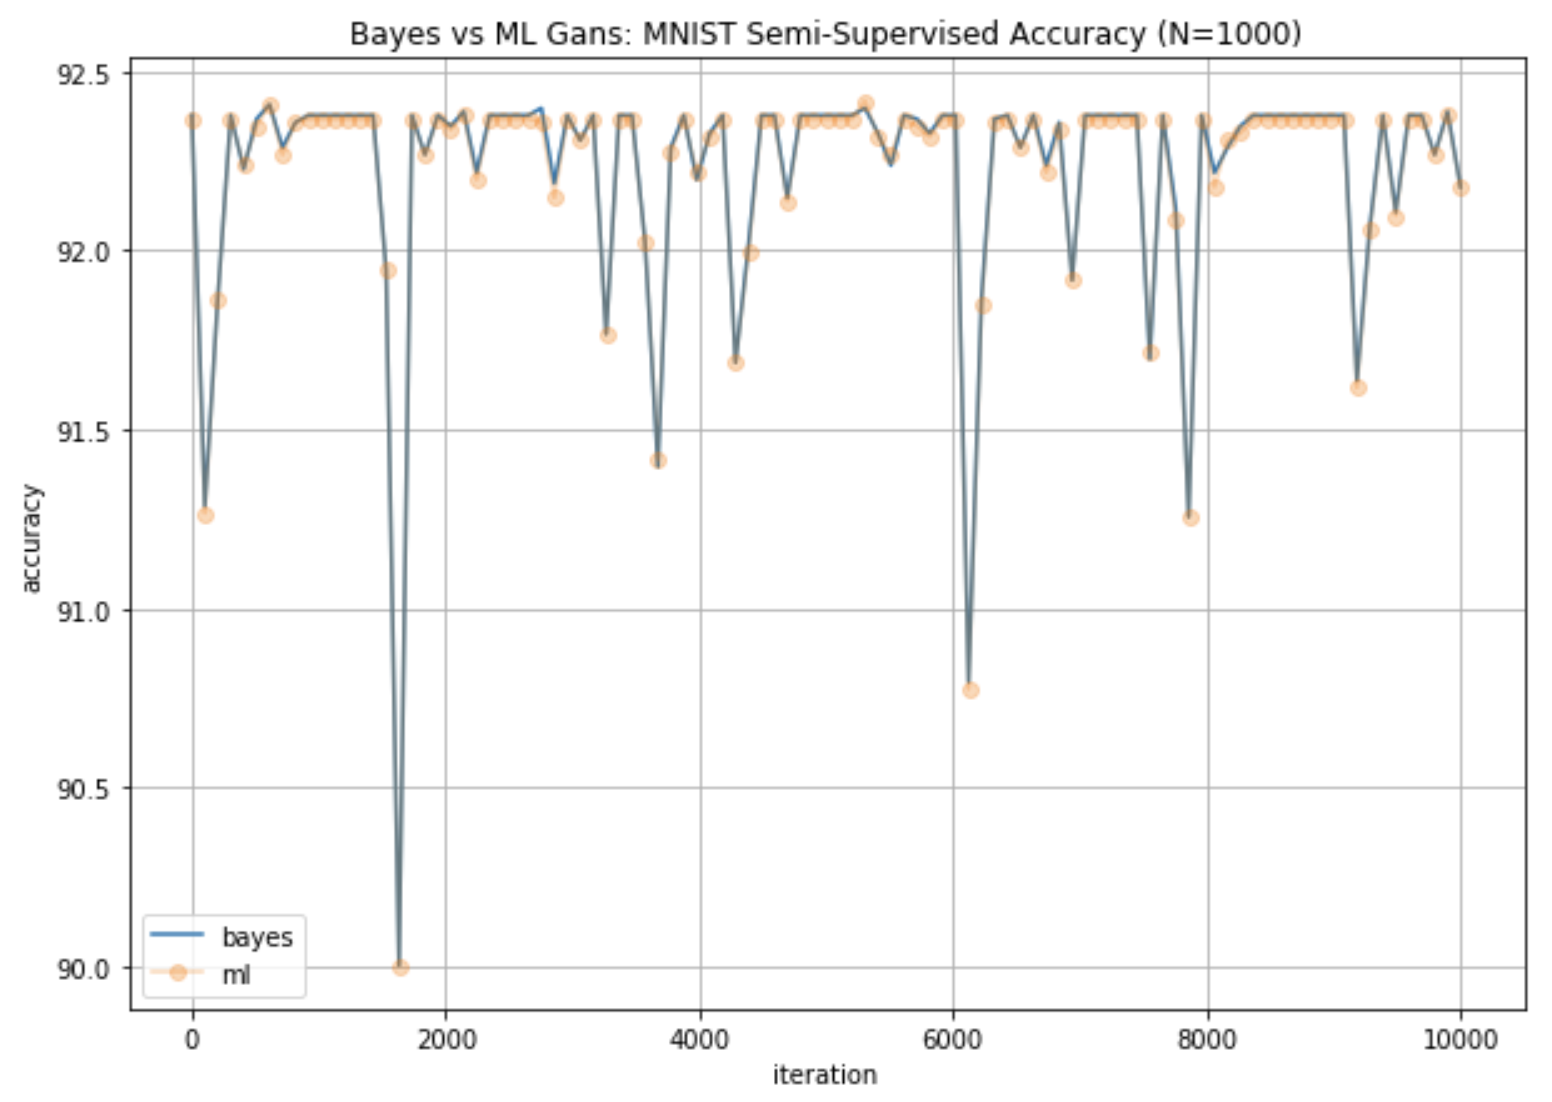

In [36]:
show_img('mnist_semi_acc.png',  width=600)

We note that the Bayesian and ML GANs achieve almost identical performance in this scenario where we have $N=1000$ labeled images. The paper showed that as $N$ gets smaller, BayesGAN relative performance is much better.

If we examine the loss curves, we also see that they are very close.

**Figure 5:** Generator and discriminator losses for BayesGAN and ML-GAN

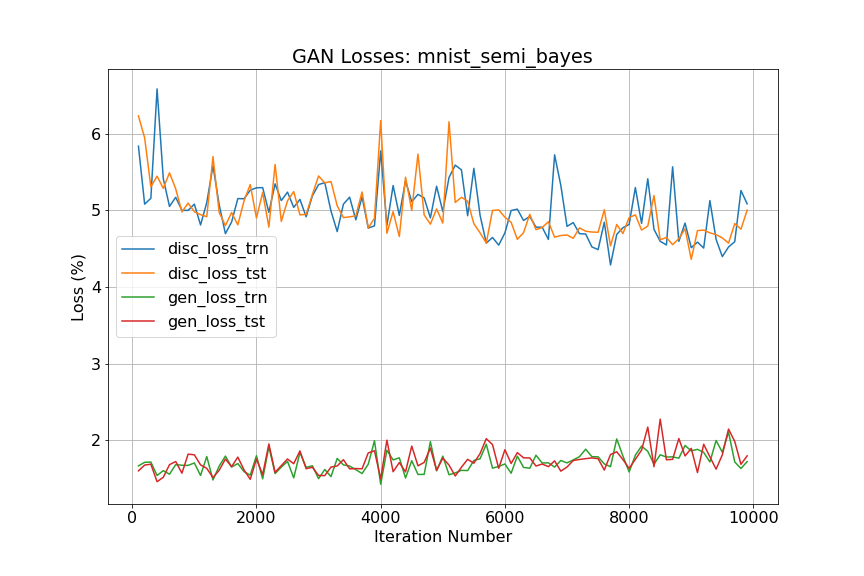

In [33]:
show_img('mnist_semi_bayes.png', width=600)

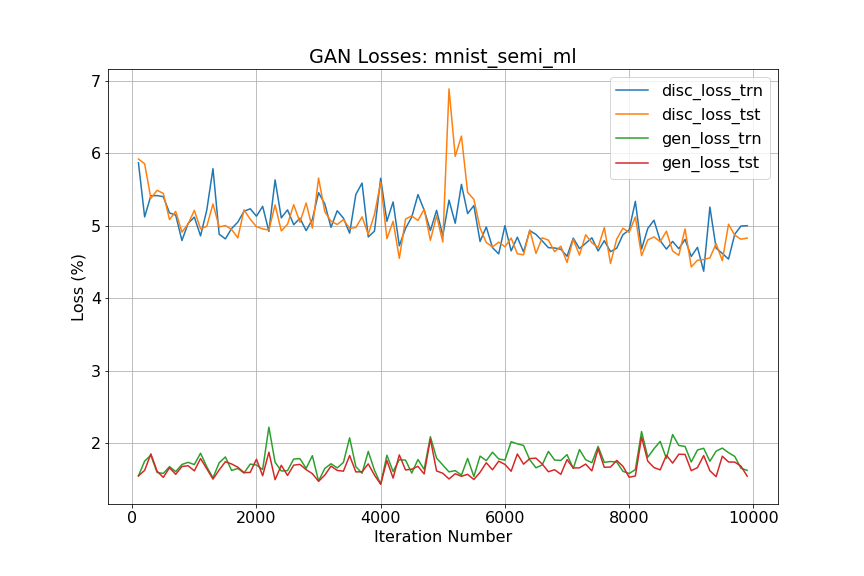

In [35]:
show_img('mnist_semi_ml.png', width=600)

### Conclusions:

Overall, the idea of using fully Bayesian probabilistic inference on GANs is very intellectually appealing. And in our experiments, BGAN seems to perform quite strongly while providing a principled method to avoid the pernicious problem of mode collapse found in regular GANs. 

We note the great results in semi-supervised learning (with small $N$) on MNIST and avoidance of mode collapse in the four shapes dataset, without *any* manual tuning! That being said, we would be remiss not to point out the fact that BGAN incurs a much higher computational cost than its maximum-likelihood counterpart. Coupled with the fact that a sufficiently tuned ML-GAN can achieve comparable performance, we don't see the *practical* implication of BGANs at this time. (With the caveat that we did not perform sufficient experimentation to make this conclusion in general, as we did not explore the hyperparameter space under each setting nearly enough).

All in all, we believe that this was an excellent paper that taught us to think about fully probabilistic inference with GANs. From an intellectual and scientific standpoint, being able to model multi-modal distributions with GANs is very appealing. And while it is certainly an interesting topic worth exploring further, we believe that more work needs to be done to speed up training before this method will be practically desired over ML-based GANs.

#### Gratuitous Titular Reference:
The painting below is titled [Potrait of Edmond Belamy](https://www.christies.com/features/A-collaboration-between-two-artists-one-human-one-a-machine-9332-1.aspx) by Obvious, 2018. This portrait is part of the La Famille de Belamy series created via GAN. It was the first artwork created by AI to be auctioned and sold at Christie's for USD434,000 in October of 2018. In the same auction, several of Andy Warhol's prints sold under USD50,000 and Roy Lichtenstein's Crying Girl sold for [USD87,500](https://www.christies.com/prints-and-multiples-27814.aspx?saletitle=). 

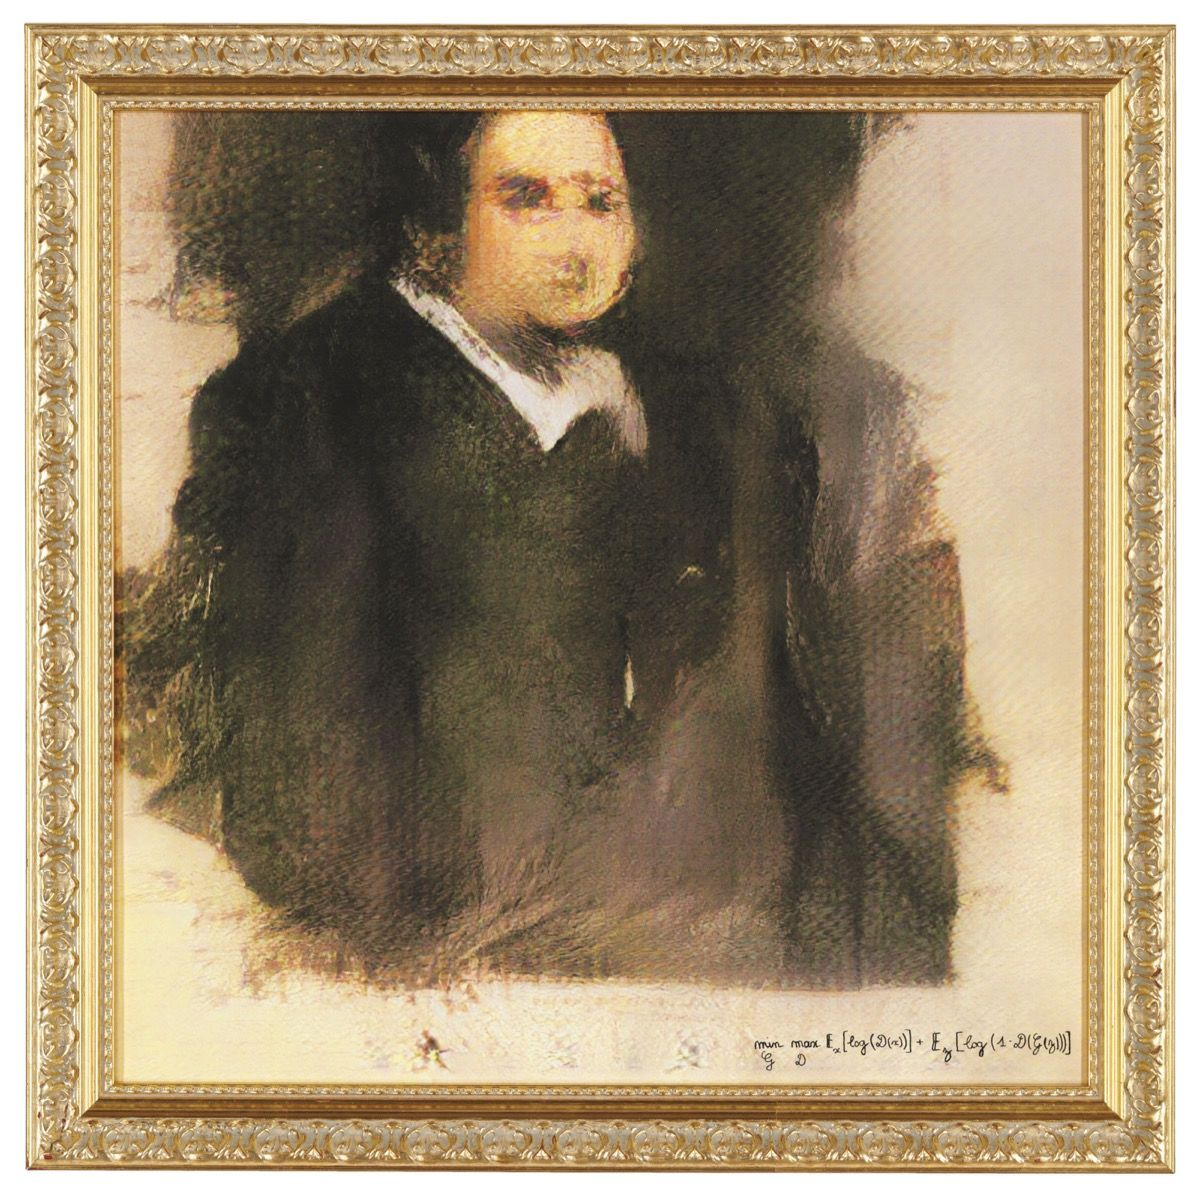

In [39]:
show_img('Edmond_Belamy1.png', width=400, height=700)

### Other Papers Refrenced in this Tutorial: 

1.Goodfellow I. et al. 2014. Generative Adversarial Networks. arXiv:1406.2661 [stat.ML]. url:https://arxiv.org/abs/1406.2661
<br>
2.Radfod A., Metz L., and Chintala S. 2015. Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks. arXiv:1511.06434 [cs.LG]. url: https://arxiv.org/abs/1511.06434
<br>
3.Salimans T. et al. 2016. Improved Techniques for Training GANs. arXiv:1606.03498 [cs.LG]. url:https://arxiv.org/abs/1606.03498
<br>
4.Chen T., Fox E., Guestrin C. 2014. Stochastic Gradient Hamiltonian Monte Carlo. arXiv:1402.4102 [stat.ME]. url: https://arxiv.org/abs/1402.4102
<br>
